In [2]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [8]:
import sqlite3
import pandas as pd
db = sqlite3.connect("../db.sqlite3")
query = """
SELECT
    orders.id AS order_id,
    orders.datetime AS order_datetime,
    orderitem.id AS orderitem_id,
    orderitem.quantity,
    product.id AS product_id,
    product.price,
    product.name
FROM restaurant_orderitem orderitem
    JOIN restaurant_order orders ON orderitem.order_id = orders.id
    JOIN restaurant_product product ON orderitem.product_id = product.id
"""
df = pd.read_sql_query(query, db)
db.close()
df.to_csv("concat_data.csv", index=False)



# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [17]:
db = sqlite3.connect("../db.sqlite3")
query = """
SELECT
    product.name as product_name,
    SUM(orderitem.quantity) as total_quantity_sold
FROM
    restaurant_orderitem orderitem
    JOIN restaurant_product product ON orderitem.product_id = product.id
GROUP BY
    orderitem.product_id
ORDER BY
    total_quantity_sold DESC
LIMIT 10;
"""
top_of_products = pd.read_sql_query(query, db)
db.close()


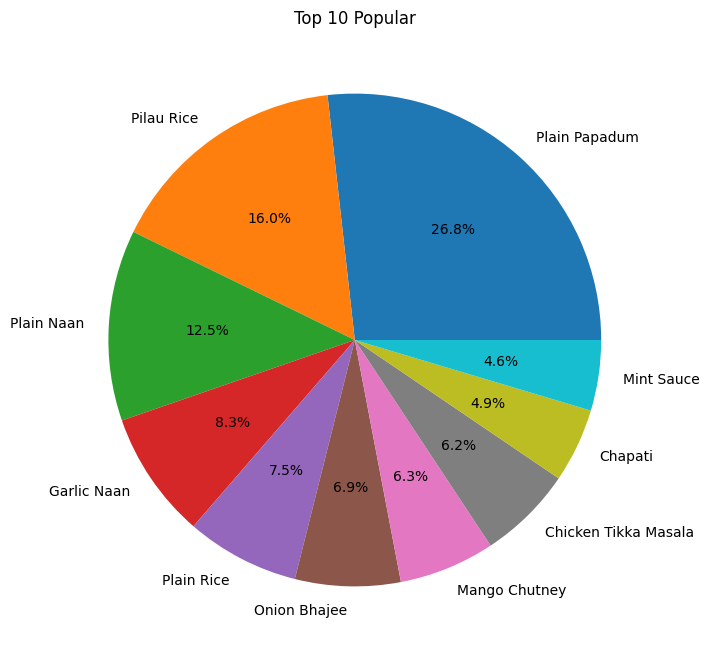

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(top_of_products["total_quantity_sold"], labels=top_of_products["product_name"], autopct="%1.1f%%")
plt.title("Top 10 Popular")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

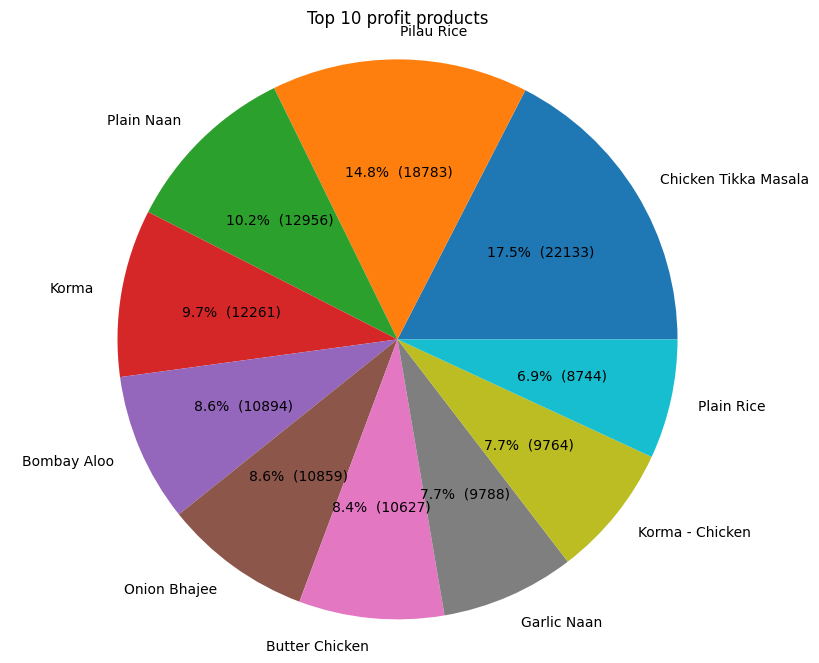

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("concat_data.csv")
df["item_price"] = df["quantity"] * df["price"]
product_quantities_df = df.groupby("name")["item_price"].sum()
top_10_products = product_quantities_df.nlargest(10)

def create_visual(values):
    def total_sum_of_values(percentage):
        total = sum(values)
        value = int(round(percentage * total / 100))
        return f"{percentage:.1f}%  ({value})".format(p=percentage, v = value)
    return total_sum_of_values

plt.figure(figsize=(10, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct=create_visual(top_10_products))
plt.axis("equal")
plt.title("Top 10 profit products")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

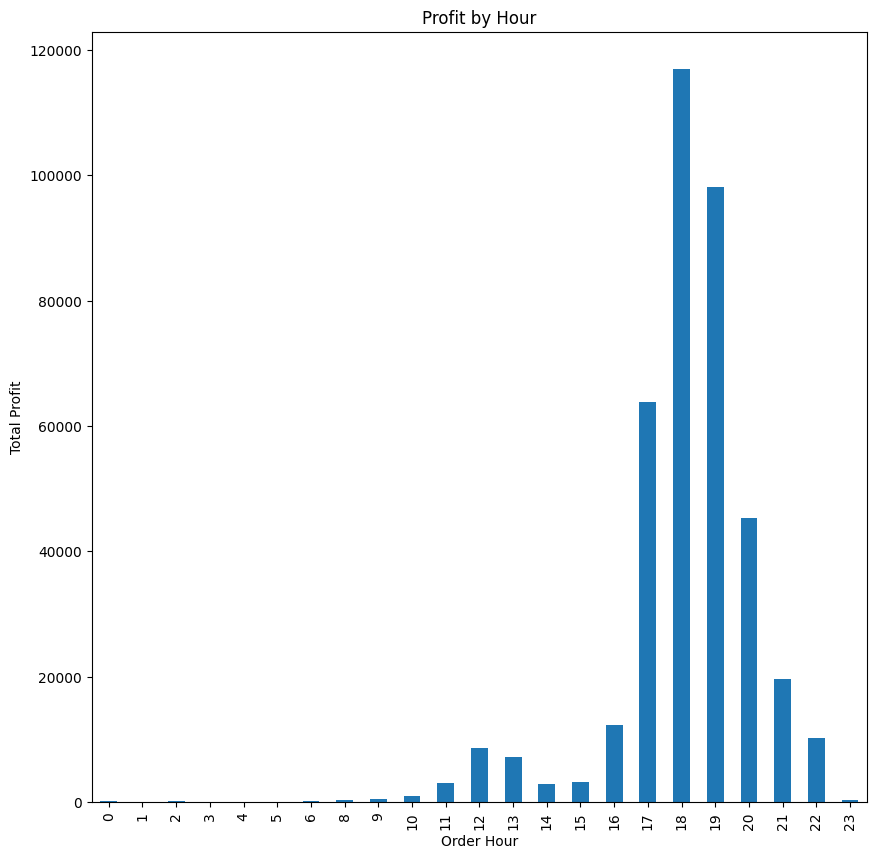

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("concat_data.csv")

df["order_datetime"] = pd.to_datetime(df["order_datetime"])
df["Order Hour"] = df["order_datetime"].dt.hour
order_hour_profit = df.groupby("Order Hour")["price"].sum()

order_hour_profit.plot.bar(title="Profit by Hour", figsize=(10, 8), ylabel="Total Profit")
plt.show()



# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

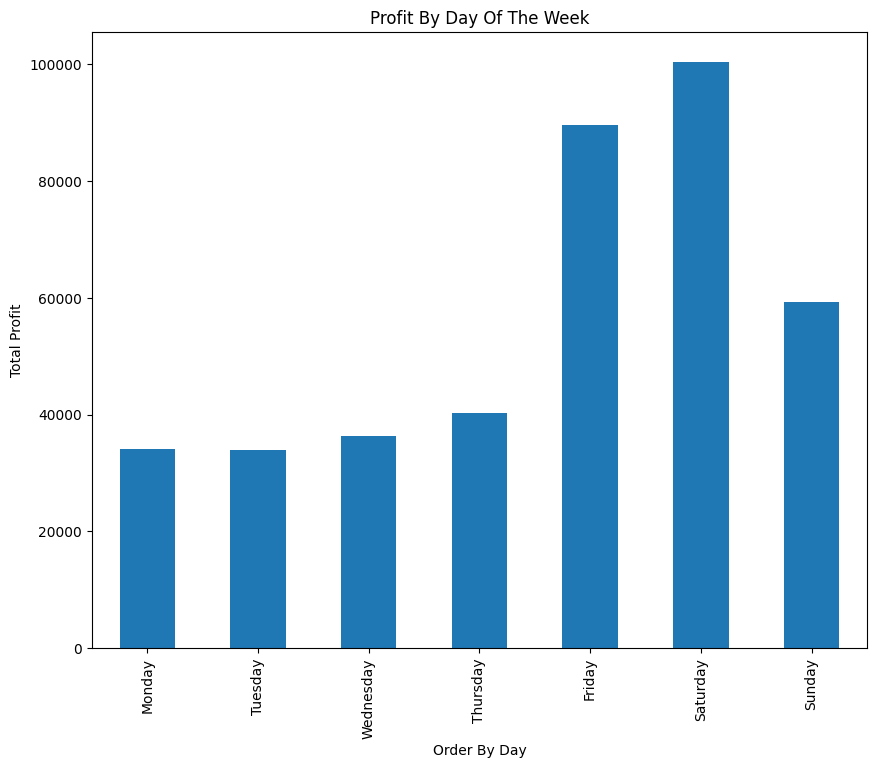

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("concat_data.csv")

df["order_datetime"] = pd.to_datetime(df["order_datetime"])
df["Order By Day"] = df["order_datetime"].dt.day_name()

daily_income = df.groupby("Order By Day")["price"].sum()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_income = daily_income.reindex(days_order)

plt.figure(figsize=(10, 8))
daily_income.plot.bar(title="Profit By Day Of The Week", ylabel="Total Profit")
plt.show()
